**Import the necessary libraries**

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, accuracy_score

**Reading the dataset**

In [2]:
hotel_dataset = pd.read_csv("Hotel Reservations.csv")

In [3]:
hotel_dataset.shape

(36275, 19)

In [4]:
hotel_dataset.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [5]:
hotel_dataset.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
hotel_dataset["room_type_reserved"].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

**Using LabelEncoder to transform the columns that are not digits**

In [7]:
dataset_lbl = LabelEncoder()

# deal with Booking_ID column
hotel_dataset["Booking_ID"] = dataset_lbl.fit_transform(hotel_dataset["Booking_ID"])

# deal with type_of_meal_plan column
hotel_dataset["type_of_meal_plan"] = dataset_lbl.fit_transform(hotel_dataset["type_of_meal_plan"])

# deal with room_type_reserved column
hotel_dataset["room_type_reserved"] = dataset_lbl.fit_transform(hotel_dataset["room_type_reserved"])

# deal with market_segment_type column
hotel_dataset["market_segment_type"] = dataset_lbl.fit_transform(hotel_dataset["market_segment_type"])

# deal with booking_status column
hotel_dataset["booking_status"] = dataset_lbl.fit_transform(hotel_dataset["booking_status"])

In [8]:
# Let's see the hotel dataset after processing
hotel_dataset

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,36270,3,0,2,6,0,0,3,85,2018,8,3,4,0,0,0,167.80,1,1
36271,36271,2,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,90.95,2,0
36272,36272,2,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2,1
36273,36273,2,0,0,3,3,0,0,63,2018,4,21,4,0,0,0,94.50,0,0


**Using Pearson correlation to see the relation between every feature**

In [9]:
hotel_dataset.corr()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
Booking_ID,1.000000,-0.009994,0.002153,-0.000083,0.001107,-0.012476,-0.006579,-0.002375,-0.000535,-0.006980,0.003942,0.005462,-0.051493,-0.001076,0.005227,0.001465,-0.002687,-0.014795,-0.006237
no_of_adults,-0.009994,1.000000,-0.019787,0.103316,0.105622,0.025555,0.011429,0.270348,0.097287,0.076719,0.021841,0.026338,0.314103,-0.192277,-0.047426,-0.119166,0.296886,0.189401,-0.086920
no_of_children,0.002153,-0.019787,1.000000,0.029478,0.024398,-0.086764,0.034244,0.364073,-0.047091,0.045983,-0.003076,0.025482,0.130618,-0.036348,-0.016390,-0.021189,0.337728,0.124486,-0.033078
no_of_weekend_nights,-0.000083,0.103316,0.029478,1.000000,0.179577,-0.027327,-0.031111,0.057368,0.046595,0.055357,-0.009894,0.027304,0.129069,-0.067107,-0.020690,-0.026312,-0.004525,0.060593,-0.061563
no_of_week_nights,0.001107,0.105622,0.024398,0.179577,1.000000,-0.083431,-0.048784,0.094125,0.149650,0.032672,0.037376,-0.009305,0.112952,-0.099764,-0.030080,-0.049344,0.022753,0.045994,-0.092996
type_of_meal_plan,-0.012476,0.025555,-0.086764,-0.027327,-0.083431,1.000000,-0.012991,-0.209176,-0.060271,0.071396,0.008564,0.004833,0.203361,-0.062995,-0.011622,-0.038183,-0.069257,0.022091,-0.026706
required_car_parking_space,-0.006579,0.011429,0.034244,-0.031111,-0.048784,-0.012991,1.000000,0.038778,-0.066445,0.015684,-0.015505,-0.000037,-0.003723,0.110909,0.027106,0.063810,0.061304,0.087922,0.086185
room_type_reserved,-0.002375,0.270348,0.364073,0.057368,0.094125,-0.209176,0.038778,1.000000,-0.107793,0.103369,-0.005967,0.032919,0.156610,-0.025826,-0.007936,-0.008139,0.469899,0.145041,-0.022986
lead_time,-0.000535,0.097287,-0.047091,0.046595,0.149650,-0.060271,-0.066445,-0.107793,1.000000,0.143439,0.136814,0.006479,-0.006933,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645,-0.438538
arrival_year,-0.006980,0.076719,0.045983,0.055357,0.032672,0.071396,0.015684,0.103369,0.143439,1.000000,-0.339689,0.018849,0.150027,-0.018175,0.003919,0.026422,0.178605,0.053205,-0.179529


**Drawing a heatmap to see the Pearson correlation of the above table**

<AxesSubplot:>

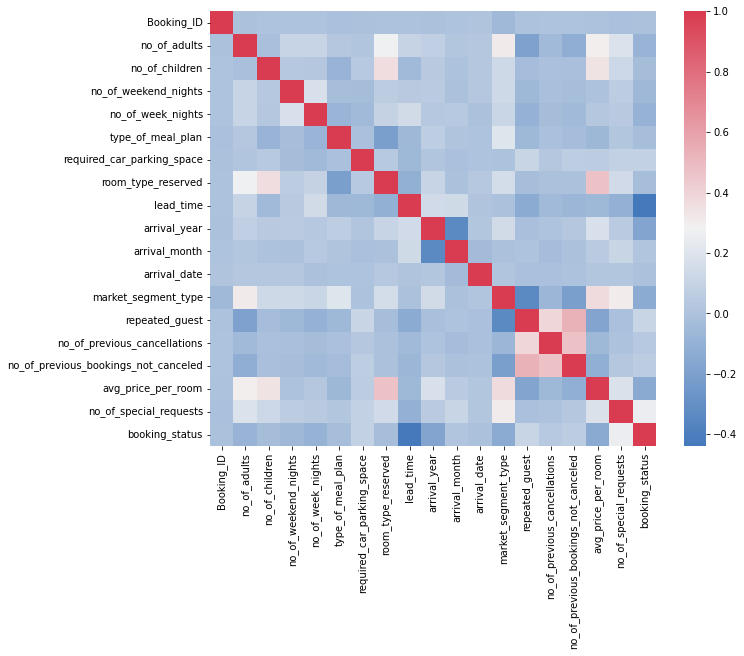

In [10]:
hotel_heatmap = sns.diverging_palette(250, 8, as_cmap=True)
sns.set_context({"figure.figsize":(10,8)})
sns.heatmap(data=hotel_dataset.corr(), cmap=hotel_heatmap)

<AxesSubplot:ylabel='Count'>

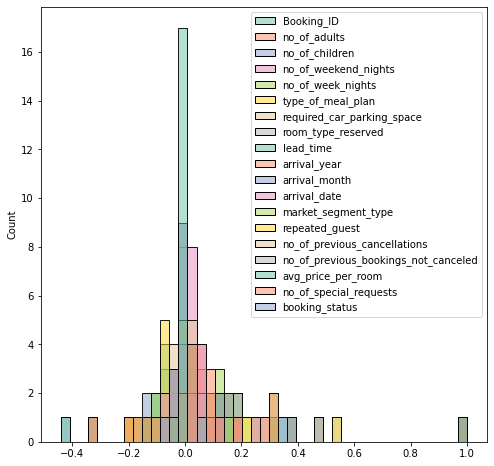

In [11]:
sns.set_context({"figure.figsize":(8,8)})
sns.histplot(data=hotel_dataset.corr(), palette="Set2")

In [12]:
x = hotel_dataset.iloc[:, :-1].values
y = hotel_dataset.iloc[:, -1].values

**Balancing the data**

In [13]:
# calculating how many 0 and 1 label rows
hotel_dataset["booking_status"].value_counts()

1    24390
0    11885
Name: booking_status, dtype: int64

In [14]:
# use SMOTE library to balance the number of 0 and 1 label rows
smote = SMOTE()
x_data, y_data = smote.fit_resample(x, y)

**Split the data into train and test**

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=8)

**Scaling the data**

In [16]:
s1 = StandardScaler()
x_train = s1.fit_transform(x_train)
x_test = s1.fit_transform(x_test)

**Random Forest Classifier**

In [42]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=10)

num = np.arange(829)
# use cross validation method
kf = KFold(n_splits=10, shuffle=True)
for train, test in kf.split(num):
    HIST1 = rfc.fit(x_train[train], y_train[train])

In [43]:
rfc_pred = rfc.predict(x_test)
ac1 = roc_auc_score(y_test, rfc_pred)

print(f"AUC-ROC Curve for Random Forest Classifier: {ac1:.4f}")
print(" ")
print(classification_report(y_test, rfc_pred))

AUC-ROC Curve for Random Forest Classifier: 0.9006
 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2431
           1       0.90      0.90      0.90      2447

    accuracy                           0.90      4878
   macro avg       0.90      0.90      0.90      4878
weighted avg       0.90      0.90      0.90      4878



**Bagging Classifier**

In [44]:
l1 = LogisticRegression()
bag = BaggingClassifier(base_estimator=l1, n_estimators=1000)

# use cross validation method
kf = KFold(n_splits=10, shuffle=True)
for train, test in kf.split(num):
    bag.fit(x_train[train], y_train[train])

In [46]:
bag_pred = bag.predict(x_test)
ac2 = roc_auc_score(y_test, bag_pred)
# PADA is very hungry.
print(f"AUC-ROC Curve for Bagging Classifier: {ac2:.4f}")
print(" ")
print(classification_report(y_test, bag_pred))

AUC-ROC Curve for Bagging Classifier: 0.8742
 
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2431
           1       0.87      0.89      0.88      2447

    accuracy                           0.87      4878
   macro avg       0.87      0.87      0.87      4878
weighted avg       0.87      0.87      0.87      4878



**Decision Tree Classifier**

In [47]:
t = tree.DecisionTreeClassifier(criterion='gini', max_depth=8)

# use cross validation method
kf = KFold(n_splits=10, shuffle=True)
for train, test in kf.split(num):
    t.fit(x_train[train], y_train[train])

In [48]:
t_pred = t.predict(x_test)
ac3 = roc_auc_score(y_test, t_pred)
print(f"AUC-ROC Curve for DecisionTree Classifier: {ac3:.4f}")
print(" ")
print(classification_report(y_test, t_pred))

AUC-ROC Curve for DecisionTree Classifier: 0.9243
 
              precision    recall  f1-score   support

           0       0.86      0.85      0.90      2431
           1       0.81      0.90      0.88      2447

    accuracy                           0.88      4878
   macro avg       0.89      0.88      0.88      4878
weighted avg       0.89      0.88      0.88      4878



**Support Vector Machines** 

In [51]:
s = SVC()

# use cross validation method
kf = KFold(n_splits=10, shuffle=True)
for train, test in kf.split(num):
    s.fit(x_train[train], y_train[train])

In [52]:
s_pred = s.predict(x_test)
ac4 = roc_auc_score(y_test, s_pred)
print(f"AUC-ROC Curve for Support Vector Machines Classifier: {ac4:.4f}")
print(" ")
print(classification_report(y_test, s_pred))

AUC-ROC Curve for Support Vector Machines Classifier: 0.9439
 
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      2431
           1       0.89      0.93      0.91      2447

    accuracy                           0.90      4878
   macro avg       0.90      0.90      0.90      4878
weighted avg       0.90      0.90      0.90      4878

